In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

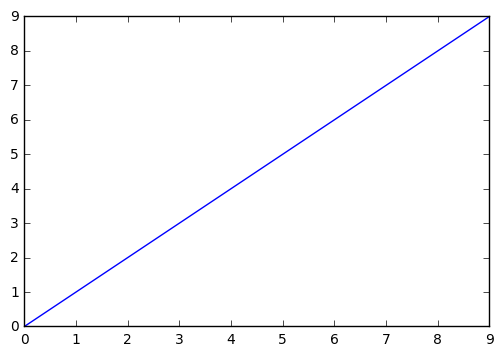

In [29]:
plt.plot(range(10))

In [30]:
2+2

4

In [31]:
import os
os.getcwd()

'/home/martin_muggli/ncbi_ecoli/metAMOS/P_2016_10_09_134056683904/Postprocess/out'

In [32]:
os.chdir('/home/martin_muggli/ncbi_ecoli/metAMOS')

In [33]:
!pwd

/home/martin_muggli/ncbi_ecoli/metAMOS


In [34]:
import subprocess

In [35]:
try:
    initPipeline_stdout = subprocess.check_output('/home/martin_muggli/local/build/metAMOS/initPipeline  -s -1 ../454sim/fragged_reads.sff', shell=True)
except:
    print initPipeline_stdout

In [36]:
import re
mobj = re.search(r"Project dir " + os.getcwd() + "/(.*) successfully created",
          initPipeline_stdout)
metAMOS_prj = mobj.group(1)


In [37]:
os.environ['PATH'] += ':/home/martin_muggli/local/build/DataAnalysis_2.9_All/packages/opt/454/apps/mapper/bin'

In [38]:
%%time

runPipeline_stdout = subprocess.check_output('which newbler ; /home/martin_muggli/local/build/metAMOS/runPipeline -a newbler -d ' + metAMOS_prj, shell=True)

CPU times: user 0 ns, sys: 8 ms, total: 8 ms
Wall time: 2.83 s


In [39]:
print runPipeline_stdout

/home/martin_muggli/local/build/DataAnalysis_2.9_All/packages/opt/454/apps/mapper/bin/newbler
[Steps to be skipped]:  set(['FindRepeats'])
Starting metAMOS pipeline
Error: cannot find BLAST DB directory, expected it in /home/martin_muggli/local/build/metAMOS/Utilities/DB/. Disabling blastdb dependent programs

[Available RAM: 517 GB]
	*ok
[Available CPUs: 64]
	*ok

________________________________________
Tasks which will be run:

Task = preprocess.Preprocess
Task = assemble.SplitAssemblers
Task = assemble.Assemble
Task = assemble.CheckAsmResults
Task = assemble.SplitMappers
Task = mapreads.MapReads
Task = mapreads.CheckMapResults
Task = mapreads.SplitForORFs
Task = findorfs.FindORFS
Task = validate.Validate
Task = findreps.FindRepeats
Task = annotate.Annotate
Task = fannotate.FunctionalAnnotation
Task = scaffold.Scaffold
Task = findscforfs.FindScaffoldORFS
Task = abundance.Abundance
Task = propagate.Propagate
Task = classify.Classify
Task = postprocess.Postprocess
____________________

In [40]:
os.chdir( metAMOS_prj + "/Postprocess/out")

In [41]:
#os.chdir("in")

In [42]:
!~/local/build/MaryGold-0.2/bnk2gml -b proba.bnk >graph.gml





 AMOS Contig Bank proba.bnk does not exist 
Read 0 motifs.
 AMOS Contig Bank proba.bnk does not exist 
Printed 0 contigs.
 AMOS Scaffold Bank proba.bnk does not exist 
Printed 0 edges.


In [43]:
!  ~/local/build/MaryGold-0.2/getSeppairs -i graph.gml >seppairs.txt
 

In [44]:
!wc seppairs.txt

0 0 0 seppairs.txt


In [45]:
! ~/local/build/MaryGold-0.2/buildMotifs -b proba.bnk -q seppairs.txt


 AMOS Contig Bank proba.bnk does not exist 
 AMOS Scaffold Bank proba.bnk does not exist 
Graph has 0 after reading initial graph
Graph has 0 after reading extra graphs
 AMOS Contig Bank proba.bnk does not exist 
Validating separation pairs
Reading ID map
 AMOS Contig Bank proba.bnk does not exist 
Building motifs


In [46]:
! LD_LIBRARY_PATH=/home/martin_muggli/local/build/usr/lib64:/home/martin_muggli/local/lib ~/local/build/MaryGold-0.2/printCounts -x ".*NC_011745\.1;.*NZ_CP007149\.1;.*NC_011601\.1" -b proba.bnk >printcounts.stdout 2>&1


In [47]:
!  ~/local/build/MaryGold-0.2/readDepth2member -d readdepths.txt -t '0.2;0.5;1' > membership.txt



In [48]:
 ! ~/local/build/MaryGold-0.2/iid2eid -b proba.bnk/ >iid2eid.txt



 AMOS Contig Bank proba.bnk/ does not exist 


In [49]:
! PATH=~/local/build/MaryGold-0.2/:$PATH python ~/local/build/MaryGold-0.2/motiftigger.py -f motifs.txt -d readdepths.txt -m membership.txt -i iid2eid.txt -g compressed.gml -b proba.bnk/ -o linearscaf.txt >motiftigger.stdout 2>&1

In [50]:
!wc linearscaf.txt

wc: linearscaf.txt: No such file or directory


In [51]:
!pwd

/home/martin_muggli/ncbi_ecoli/metAMOS/P_2016_10_09_134300122897/Postprocess/out
